In [549]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from icecream import ic
from pathlib import Path
import random
from sklearn.model_selection import train_test_split
from itertools import chain
from mpl_toolkits import mplot3d
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [395]:
RANDOM_STATE = 21

In [396]:
random.seed(RANDOM_STATE)

In [397]:
def calculate_vif_(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(f"dropping {X.iloc[:, variables].columns[maxloc]} at index: {maxloc}")
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [398]:
def drop_correlated(X, thresh = 0.95):
    # Create correlation matrix
    corr_matrix = X.corr().abs()
    ic(corr_matrix)

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

    # Drop features 
    X.drop(to_drop, axis=1, inplace=True)
    return X

## Preparing the first data set (Credit risk data)

In [291]:
df = pd.read_csv("credit-data.csv")
df.drop(["CUSTOMER_ID", "ASSESSMENT_YEAR"],axis = 1, inplace = True)
df.dropna(inplace = True) #drops 3 observations
df = pd.get_dummies(df, drop_first = True)
y1 = df.DEFAULT_FLAG.to_numpy()
X1 = df.drop("DEFAULT_FLAG", axis = 1)
X1 = calculate_vif_(X1, thresh = 10).to_numpy()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, random_state = RANDOM_STATE, stratify = y1)

dropping ACCESS_CREDIT at index: 2
dropping SHORT_TERM_LIQUIDITY at index: 3
dropping PRODUCT_DEMAND at index: 0
dropping MEDIUM_TERM_LIQUIDITY at index: 2
dropping OWNERS_MANAGEMENT at index: 0
dropping PROFITABILITY at index: 0
Remaining variables:
Index(['GROUP_FLAG', 'TURNOVER', 'INDUSTRY_Electricity, Gas and Water ',
       'INDUSTRY_Extractive Industries ', 'INDUSTRY_Hotels and Leisure',
       'INDUSTRY_Manufacturing',
       'INDUSTRY_Office Machinery and Computer Industries', 'INDUSTRY_Other',
       'INDUSTRY_Property and Construction Sectors', 'INDUSTRY_Trade',
       'INDUSTRY_Transport, Storage and Communications Infrastructure'],
      dtype='object')


## Preparing the banknote authentication dataset

In [399]:
df = pd.read_csv("data_banknote_authentication.txt", header=None)
df.rename(columns = {0:"Variance", 1:"Skewness", 2:"Curtosis", 3:"Entropy", 4:"Inauthentic" }, inplace = True)
df.dropna(inplace = True)
df = pd.get_dummies(df, drop_first = True)
y1 = df.Inauthentic.to_numpy()
X1 = df.drop("Inauthentic", axis = 1)
X1 = calculate_vif_(X1, thresh=10).to_numpy()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, random_state = RANDOM_STATE, stratify = y1)

Remaining variables:
Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')


## Preparing the NBA dataset

In [364]:
df = pd.read_csv("nba_logreg.csv")
df.drop(["Name"],axis = 1, inplace = True)
df.dropna(inplace = True)
df = pd.get_dummies(df, drop_first = True)
y1 = df.TARGET_5Yrs.to_numpy()
X1 = df.drop("TARGET_5Yrs", axis = 1)
X1 = drop_correlated(X1)
X1 = calculate_vif_(X1, thresh=5).to_numpy()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, random_state = RANDOM_STATE, stratify = y1)

ic| corr_matrix:                GP       MIN       PTS       FGM       FGA       FG%   3P Made  \
                 GP       1.000000  0.590596  0.539069  0.543000  0.517395  0.296987  0.108195   
                 MIN      0.590596  1.000000  0.911746  0.902864  0.910194  0.208341  0.389474   
                 PTS      0.539069  0.911746  1.000000  0.990874  0.979676  0.261587  0.345289   
                 FGM      0.543000  0.902864  0.990874  1.000000  0.980117  0.297113  0.287956   
                 FGA      0.517395  0.910194  0.979676  0.980117  1.000000  0.135815  0.388860   
                 FG%      0.296987  0.208341  0.261587  0.297113  0.135815  1.000000  0.291573   
                 3P Made  0.108195  0.389474  0.345289  0.287956  0.388860  0.291573  1.000000   
                 3PA      0.099626  0.402814  0.355198  0.297898  0.412053  0.347680  0.982579   
                 3P%      0.038209  0.165997  0.151072  0.119493  0.197160  0.330690  0.589855   
                 FTM

dropping MIN at index: 1
dropping FG% at index: 2
dropping PTS at index: 1
dropping TOV at index: 10
dropping GP at index: 0
dropping DREB at index: 5
dropping STL at index: 6
dropping FTM at index: 2
dropping FT% at index: 2
Remaining variables:
Index(['3P Made', '3P%', 'OREB', 'AST', 'BLK'], dtype='object')


In [283]:
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


## Preparing the ionosphere dataset

In [343]:
df = pd.read_csv("ionosphere.data", header=None)
df.dropna(inplace = True)
df = pd.get_dummies(df, drop_first = True)
y1 = df['34_g'].to_numpy()
X1 = df.drop('34_g', axis = 1)
X1 = df.drop(1, axis = 1)
X1 = calculate_vif_(X1, thresh=5)
X1 = drop_correlated(X1).to_numpy()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, random_state = RANDOM_STATE, stratify = y1)

dropping 8 at index: 7
dropping 14 at index: 12
dropping 4 at index: 3
dropping 20 at index: 16
dropping 34_g at index: 29
dropping 16 at index: 12


ic| corr_matrix:           0         2         3         5         7         9         10  \
                 0   1.000000  0.302034  0.006529  0.127606  0.027079  0.051883  0.034138   
                 2   0.302034  1.000000  0.143365  0.025768  0.008717  0.047916  0.325016   
                 3   0.006529  0.143365  1.000000  0.190308  0.255003  0.207697  0.190090   
                 5   0.127606  0.025768  0.190308  1.000000  0.274747  0.200080  0.291447   
                 7   0.027079  0.008717  0.255003  0.274747  1.000000  0.373567  0.364003   
                 9

dropping 6 at index: 4
Remaining variables:
Index([ 0,  2,  3,  5,  7,  9, 10, 11, 12, 13, 15, 17, 18, 19, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype='object')


   0.051883  0.047916  0.207697  0.200080  0.373567  1.000000  0.337374   
                 10  0.034138  0.325016  0.190090  0.291447  0.364003  0.337374  1.000000   
                 11  0.072216  0.169981  0.315877  0.163933  0.429146  0.441505  0.217968   
                 12  0.102558  0.217597  0.149216  0.307197  0.355875  0.406358  0.619217   
                 13  0.199230  0.164550  0.236604  0.135206  0.253740  0.323813  0.216747   
                 15  0.100474  0.094301  0.185872  0.157740  0.419673  0.334135  0.031705   
                 17  0.076019  0.172002  0.147451  0.188073  0.068717  0.130752  0.107085   
                 18  0.200237  0.285280  0.332213  0.208571  0.400523  0.471665  0.590598   
                 19  0.019230  0.150800  0.167244  0.061261  0.077624  0.001418  0.128132   
                 21  0.153902  0.138065  0.035401  0.132422  0.212007  0.040414  0.325267   
                 22  0.011772  0.250832  0.143719  0.215778  0.270624  0.318463  0.56168

## Preparing the second data set (Coke data)

In [224]:
df = pd.read_excel("coke-data.xls")
y2 = df.coke.to_numpy()
X2 = df.drop("coke", axis = 1)
#X2 = calculate_vif_(X2, thresh = 10).to_numpy()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.8, random_state = RANDOM_STATE, stratify = y2)

## Preparing the third data set (Phone contract data)

In [226]:
df = pd.read_excel("phoneContract-data.xlsx")
df.drop("lp", axis = 1, inplace = True)
y3 = df.y_1_0.to_numpy()
X3 = df.drop("y_1_0", axis = 1)
#X3 = calculate_vif_(X3, thresh = 10).to_numpy()
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size = 0.8, random_state = RANDOM_STATE, stratify = y3)

In [227]:
Cancer = pd.read_csv("wdbc.data", header=None)
Cancer.iloc[:,1] = (Cancer[1] == "M").astype(int)
Cancer = Cancer.drop(columns=[0])
Y = Cancer[1].to_numpy()
X = Cancer.loc[:,2:]
X = calculate_vif_(X)
X = X.to_numpy()
X_normalized = (X - X.mean(0)) / X.std(0)
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y)

dropping 2 at index: 0
dropping 22 at index: 19
dropping 4 at index: 1
dropping 24 at index: 19
dropping 11 at index: 7
dropping 26 at index: 19
dropping 23 at index: 17
dropping 31 at index: 22
dropping 30 at index: 21
dropping 8 at index: 4
dropping 12 at index: 6
dropping 29 at index: 18
dropping 6 at index: 2
dropping 7 at index: 2
dropping 5 at index: 1
dropping 27 at index: 13
dropping 14 at index: 4
dropping 10 at index: 2
dropping 3 at index: 0
dropping 19 at index: 6
dropping 17 at index: 4
dropping 25 at index: 7
dropping 9 at index: 0
dropping 20 at index: 4
dropping 21 at index: 4
dropping 16 at index: 2
Remaining variables:
Int64Index([13, 15, 18, 28], dtype='int64')


In [228]:
# add a dataset to test multiclass
df = pd.read_csv("Iris.csv")
df.drop("Id", axis = 1, inplace = True)
X = calculate_vif_(df.drop("Species", axis = 1, inplace = False)).to_numpy()
y = pd.get_dummies(df.Species, drop_first = False).to_numpy()
X_multi_train, X_multi_test, Y_multi_train, Y_multi_test = train_test_split(X, y, random_state=RANDOM_STATE)

dropping SepalLengthCm at index: 0
dropping PetalLengthCm at index: 1
Remaining variables:
Index(['SepalWidthCm', 'PetalWidthCm'], dtype='object')


In [229]:
from sklearn.model_selection import train_test_split
Cancer = pd.read_csv("wdbc.data", header=None)
Cancer.iloc[:,1] = (Cancer[1] == "M").astype(int)
Cancer = Cancer.drop(columns=[0])

In [230]:
path = Path("../Labs/lab2_logistic_regression/SAheart.data")
df = pd.read_csv(path, sep = ",")
df = df.drop("row.names", axis = 1)
df["famhist_present"] = pd.get_dummies(df.famhist)["Present"] # famhist can be: present | absent
df.drop("famhist", axis = 1, inplace = True)

X = df.drop("chd", axis = 1, inplace=False).to_numpy()
y = df.chd.to_numpy()

FileNotFoundError: [Errno 2] No such file or directory: '../Labs/lab2_logistic_regression/SAheart.data'

In [3]:
df = pd.read_csv("data.simple.test.10000.csv")
df["predict"] = pd.get_dummies(df.cls, drop_first = True)
df.drop("cls", axis = 1, inplace = True)

X = df.drop("predict", axis = 1, inplace = False).to_numpy()
y = df.predict.to_numpy()

In [74]:
#multiclass
df = pd.read_csv("Iris.csv")
df.drop("Id", axis = 1, inplace = True)
X = df.drop("Species", axis = 1, inplace = False).to_numpy()
y = pd.get_dummies(df.Species, drop_first = False).to_numpy()


In [183]:
a = np.random.normal(loc = 5, size = (4,1))
X = np.random.normal(size = (4,4))

In [198]:
a * X

array([[ -4.04974479,  -4.18799392,  -3.29439688,   6.8390388 ],
       [  1.0370668 ,   1.07695354,   1.70801861,  -9.02168428],
       [ -8.23941684,   1.76495676,   2.76678308,  -2.66326346],
       [-15.97538503,  -3.11095196,  -7.4652715 ,   1.45880529]])

In [186]:
a

array([[5.41000668],
       [5.17813934],
       [6.18265834],
       [5.79558743]])

In [75]:
df = make_classification(n_samples=100, n_features=20, n_informative = 2,
                         n_redundant = 1 , n_repeated=0, n_classes=2, n_clusters_per_class = 2)
X = df[0]
y = df[1]

In [400]:
from scipy.special import expit


class logit():
    def __init__(self, exog, endog, add_intercept = True):
        if len(endog.shape) > 1:
            self.y = endog # T x 1
        elif len(endog.shape) == 1:
            self.y = endog.reshape(-1,1)
        if add_intercept == True:
            self.X = np.concatenate((np.ones(shape = (exog.shape[0], 1)), exog), axis = 1) # T x k
        elif add_intercept == False:
            self.X = exog
        #self.b = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y # k x 1, initialized with LS estimator
        if self.y.shape[1] == 1:
            self.b = np.random.normal(size = (self.X.shape[1],1))
            self.multiclass = 0
        elif self.y.shape[1] > 1:# b - k x J (where J - number or classes)
            self.b = np.random.normal(size = (self.X.shape[1], self.y.shape[1]))
            self.multiclass = 1
            

    
    def sigmoid(x): # returns output with the same dimensions as x 
        return 1 / (1 + np.exp(-x))
    
    def cross_entrophy(y_true, y_pred): #returns a scalar value
        # epsilon = 1e-5 ? why?
        return -np.sum(y_true * np.log(y_pred, out=np.zeros_like(y_pred), where=(y_pred!=0)) + (1 - y_true) * np.log(1 - y_pred, out=np.zeros_like(1-y_pred), where=(1-y_pred!=0)))
    
    def cross_entrophy_der(X, y, b): # returns X.shape[0] x k vector 
        p_hat = logit.sigmoid(X @ b) # T x 1
        return X * (p_hat - y)  # X.shape[0] x k
    """
    def softmax(X, b):
        return np.exp(X @ b) / np.sum(np.exp(X @ b))
    """
    def softmax(x):
        # Compute softmax values for each sets of scores in x.
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis = 0)
    
    def loglikelihood_multiclass(X, y, b):
        # X - T x k
        # y - T x J
        # b - k x J
        return np.sum(((X @ b) * y)[:,:-1]) - np.sum(np.log(1 + np.sum(np.exp(X @ b[:,:-1]), axis = 1)))
                                                   
    def loglikelihood_multiclass_der(X, y, b):
        # X - T x k
        # y - T x J
        # b - k x J
        return X.T @ (y - logit.softmax(X @ b))[:,:-1]
    
    def predict_proba(self, X): # returns X.shape[0] x 1 vector
        if self.multiclass == 1:
            return logit.softmax(X @ self.b)
        else:
            return logit.sigmoid(X @ self.b)
        
    def predict_y(self, X, threshold = 0.5): # returns X.shape[0] x 1 vector
        p_hat = 1 / (1 + np.exp( - X @ self.b))
        if self.multiclass==0:
            return np.array([1 if i[0] > threshold else 0 for i in p_hat]).reshape(-1,1)
        else:
            results = np.zeros(shape=p_hat.shape)
            for i in range(0, len(p_hat)):
                results[i][np.argmax(p_hat[i])] = 1
            return results
    
    
    def accuracy(self, X, y):
        y_hat = logit.predict_y(self, X)
        truths = y_hat == y
        ts = [np.prod(t) for t in truths]
        correct_num = np.sum(ts)
        return correct_num / X.shape[0]

    def recall(self, X, y):
        y_hat = logit.predict_y(self, X)
        if not self.multiclass:
            same = y[y_hat == y]
            true_positives = np.sum(same[same == 1])
            different = y[y_hat != y]
            false_negatives = np.sum(different[different == 1])
        else:
            true_positives = 0
            false_negatives = 0
            truths = y_hat == y
            ts = [np.prod(t) for t in truths]
            same = y[ts]
            fs = [not np.prod(t) for t in truths]
            different = y[fs]
            for i in range(0, self.y.shape[1]):
                mask = np.zeros(shape=(self.y.shape[1]))
                mask[i] = 1
                true_positives += np.sum(same[same == mask])
                false_negatives += np.sum(different[different == mask])
        return true_positives/(false_negatives+true_positives)
    
    def precision(self, X, y):
        y_hat = logit.predict_y(self, X)
        if not self.multiclass:
            same = y[y_hat == y]
            true_positives = np.sum(same[same == 1])
            different = y_hat[y_hat != y]
            false_positives = np.sum(different[different == 1])
        else:
            true_positives = 0
            false_positives = 0
            truths = y_hat == y
            ts = [np.prod(t) for t in truths]
            same = y[ts]
            fs = [not np.prod(t) for t in truths]
            different = y_hat[fs]
            for i in range(0, self.y.shape[1]):
                mask = np.zeros(shape=(self.y.shape[1]))
                mask[i] = 1
                true_positives += np.sum(same[same == mask])
                false_positives += np.sum(different[different == mask])
        return true_positives/(false_positives+true_positives)
    
    def f_measure(self, X, y):
        precision = self.precision(X, y)
        recall = self.recall(X, y)
        return 2 * ( precision * recall) / (precision + recall)
    
    def r2(self, y):
        p_hat = logit.sigmoid(self.X @ self.b)
        lnL1 = logit.cross_entrophy(self.y, p_hat)
        y_hat = np.mean(y)
        lnL2 = y_hat * np.log(y_hat) + (1 - y_hat) * np.log(1 - y_hat)
        return 1-lnL1/lnL2
    
    
    def fit(self, stop_condition = 0.001, lr = 0.001, method = "GD", verbose = False,
           max_iter = 300):
        # list with losses obtained when running the learing process
        loss = []
        betas = []
        # p - vector of probabilities, shape T x 1
        p = logit.sigmoid(self.X @ self.b)
        loss.append(logit.cross_entrophy(self.y, p))
        betas.append(self.b)
        # condtion (when satisfied algorithm will stop)
        cond = 1
        # iteration counter
        i = 1
        
        
        while cond > stop_condition and i < max_iter:
            
            if method == "GD":
                if self.multiclass == 1:
                    gradient = logit.loglikelihood_multiclass_der(self.X, self.y, self.b) / X.shape[0]
                    print(gradient.shape, self.y.shape)
                    gradient = np.append(gradient, np.zeros(shape = (gradient.shape[0],1)), axis = 1)  
                else:
                    gradient = np.mean(logit.cross_entrophy_der(self.X, self.y, self.b), axis = 0).reshape(-1,1)
                    
                # updating weights
                beta_old = self.b
                self.b = beta_old - lr * gradient
                betas.append(self.b)
                
                # update the value of condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                #print(cond)

                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                if self.multiclass == 1:
                    loss.append(logit.loglikelihood_multiclass(self.X, self.y, self.b))
                else:
                    loss.append(logit.cross_entrophy(self.y, p))
                    
            
            elif method == "SGD":
                for j in range(self.X.shape[0]):
                    gradient = logit.cross_entrophy_der(self.X[j,:].reshape(1,-1), self.y[j,:], self.b).reshape(-1,1)
                    beta_old = self.b
                    self.b = beta_old - lr * gradient
                    cond = np.max(np.abs((beta_old - self.b) / beta_old))
                    
                    # loss function after one calculation
                    betas.append(self.b)       
                    p = logit.sigmoid(self.X @ self.b)
                    loss.append(logit.cross_entrophy(self.y, p))
                    
                    if cond < stop_condition:
                        print("Breaking")
                        break
                print(cond)
                    
                    

            elif method == "IRLS":                       
                p = logit.sigmoid(self.X @ self.b).reshape(-1,1)
                # diagonal T x T matrix with values "p_i * (1-p_i)" on the diagonal
                W = np.diag(np.diag(p @ (1 - p).T)) + 1e-6
                # T x 1 wector of transformed response variable
                z = self.X @ self.b + np.linalg.inv(W) @ (self.y - p)
                
                # updating beta 
                beta_old = self.b
                self.b = np.linalg.inv(self.X.T @ W @ self.X) @ self.X.T @ W @ z
                betas.append(self.b)
                # updating condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                loss.append(logit.cross_entrophy(self.y, p))
                
            elif method == "IRLS2":
                p = logit.sigmoid(self.X @ self.b).reshape(-1,1)
                W = p * (1 - p) + 1e-6# vector
 
                # T x 1 wector of transformed response variable
                z = self.X @ self.b + (1 / W) * (self.y - p)
                X_temp = W * self.X
                # updating beta 
                beta_old = self.b
                self.b = np.linalg.inv(self.X.T @ X_temp) @ X_temp.T @ z
                betas.append(self.b)
                # updating condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                loss.append(logit.cross_entrophy(self.y, p))
                
            elif method == "IRLS3":
                p = logit.sigmoid(self.X @ self.b).reshape(-1,1)
                W = p * (1 - p)# vector
                X_temp = W * self.X
                beta_old = self.b
                self.b = self.b + np.linalg.inv(self.X.T @ X_temp) @ self.X.T @ (self.y - p)
                betas.append(self.b)
                # updating condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                loss.append(logit.cross_entrophy(self.y, p))
                
                
                
            if verbose == True:
                print("iteration", i, "loss function value =", loss[-1])
                
            i+=1
            

        #print(cond)
        return loss, betas
    

In [464]:
rates = list(chain.from_iterable([ [0.5/(10**i), 0.1/(10**i)] for i in range(2, 10)]))

In [465]:
iters = list(chain.from_iterable([[10**i, 5*(10**i)] for i in range(2, 10)]))

In [458]:
model1 = logit(X1_train, y1_train ,add_intercept = True)
loss1, betas1 = model1.fit(method = "GD", verbose = True, max_iter = 1000, lr = 0.001, stop_condition = 0.00001 )
print("GD accuracy:", model1.accuracy(model1.X, model1.y))
print("GD recall:", model1.recall(model1.X, model1.y))
print("GD precision:", model1.precision(model1.X, model1.y))
print("GD F measure:", model1.f_measure(model1.X, model1.y))

iteration 1 loss function value = 3465.0555190427253
iteration 2 loss function value = 3461.2629860569396
iteration 3 loss function value = 3457.4748640253993
iteration 4 loss function value = 3453.6911462572452
iteration 5 loss function value = 3449.9118261250005
iteration 6 loss function value = 3446.136896906844
iteration 7 loss function value = 3442.3663519807806
iteration 8 loss function value = 3438.600184658606
iteration 9 loss function value = 3434.8383883232327
iteration 10 loss function value = 3431.080956310008
iteration 11 loss function value = 3427.3278819767
iteration 12 loss function value = 3423.5791586965615
iteration 13 loss function value = 3419.834779830924
iteration 14 loss function value = 3416.094738754231
iteration 15 loss function value = 3412.359028829289
iteration 16 loss function value = 3408.627643461792
iteration 17 loss function value = 3404.9005760263035
iteration 18 loss function value = 3401.177819894348
iteration 19 loss function value = 3397.45936845

iteration 192 loss function value = 2813.278641296357
iteration 193 loss function value = 2810.21234197825
iteration 194 loss function value = 2807.149283429036
iteration 195 loss function value = 2804.08946072554
iteration 196 loss function value = 2801.0328689787702
iteration 197 loss function value = 2797.9795033132305
iteration 198 loss function value = 2794.929358869813
iteration 199 loss function value = 2791.8824308124613
iteration 200 loss function value = 2788.838714319331
iteration 201 loss function value = 2785.7982045848903
iteration 202 loss function value = 2782.7608968286186
iteration 203 loss function value = 2779.726786284607
iteration 204 loss function value = 2776.6958682021045
iteration 205 loss function value = 2773.66813785694
iteration 206 loss function value = 2770.643590536424
iteration 207 loss function value = 2767.6222215453263
iteration 208 loss function value = 2764.604026213071
iteration 209 loss function value = 2761.5889998806174
iteration 210 loss func

iteration 375 loss function value = 2301.957284377834
iteration 376 loss function value = 2299.4190452651023
iteration 377 loss function value = 2296.883411585786
iteration 378 loss function value = 2294.3503809721387
iteration 379 loss function value = 2291.819951063968
iteration 380 loss function value = 2289.2921195097597
iteration 381 loss function value = 2286.7668839655807
iteration 382 loss function value = 2284.2442420950256
iteration 383 loss function value = 2281.724191569453
iteration 384 loss function value = 2279.2067300682293
iteration 385 loss function value = 2276.691855278692
iteration 386 loss function value = 2274.1795648948555
iteration 387 loss function value = 2271.669856618515
iteration 388 loss function value = 2269.1627281598576
iteration 389 loss function value = 2266.658177234771
iteration 390 loss function value = 2264.156201568112
iteration 391 loss function value = 2261.6567988917404
iteration 392 loss function value = 2259.1599669439993
iteration 393 loss

iteration 562 loss function value = 1870.3918933318566
iteration 563 loss function value = 1868.3061763388687
iteration 564 loss function value = 1866.2227193191552
iteration 565 loss function value = 1864.1415208170902
iteration 566 loss function value = 1862.0625793806087
iteration 567 loss function value = 1859.9858935611069
iteration 568 loss function value = 1857.9114619134414
iteration 569 loss function value = 1855.8392829960446
iteration 570 loss function value = 1853.769355370949
iteration 571 loss function value = 1851.7016776035925
iteration 572 loss function value = 1849.6362482629756
iteration 573 loss function value = 1847.5730659216017
iteration 574 loss function value = 1845.512129155492
iteration 575 loss function value = 1843.4534365441173
iteration 576 loss function value = 1841.396986670526
iteration 577 loss function value = 1839.3427781213795
iteration 578 loss function value = 1837.2908094866507
iteration 579 loss function value = 1835.2410793599433
iteration 580

iteration 732 loss function value = 1547.229800765279
iteration 733 loss function value = 1545.5101235581087
iteration 734 loss function value = 1543.7925067819756
iteration 735 loss function value = 1542.076949501992
iteration 736 loss function value = 1540.3634507849497
iteration 737 loss function value = 1538.6520096992485
iteration 738 loss function value = 1536.9426253149668
iteration 739 loss function value = 1535.235296703715
iteration 740 loss function value = 1533.5300229386503
iteration 741 loss function value = 1531.8268030944957
iteration 742 loss function value = 1530.1256362473873
iteration 743 loss function value = 1528.4265214749648
iteration 744 loss function value = 1526.729457856259
iteration 745 loss function value = 1525.0344444716889
iteration 746 loss function value = 1523.3414804029978
iteration 747 loss function value = 1521.6505647332542
iteration 748 loss function value = 1519.9616965468454
iteration 749 loss function value = 1518.2748749293162
iteration 750 

iteration 918 loss function value = 1261.8467074988366
iteration 919 loss function value = 1260.4940748254608
iteration 920 loss function value = 1259.1433158274792
iteration 921 loss function value = 1257.7944292023656
iteration 922 loss function value = 1256.4474136424992
iteration 923 loss function value = 1255.1022678351744
iteration 924 loss function value = 1253.7589904625638
iteration 925 loss function value = 1252.4175802017098
iteration 926 loss function value = 1251.078035724536
iteration 927 loss function value = 1249.7403556978088
iteration 928 loss function value = 1248.4045387831468
iteration 929 loss function value = 1247.0705836369962
iteration 930 loss function value = 1245.738488910642
iteration 931 loss function value = 1244.4082532501811
iteration 932 loss function value = 1243.0798752965202
iteration 933 loss function value = 1241.7533536853657
iteration 934 loss function value = 1240.4286870472329
iteration 935 loss function value = 1239.105874007419
iteration 936

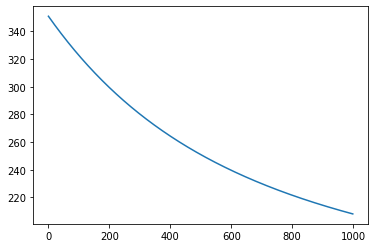

In [426]:
plt.plot(loss1)

In [543]:
losses=[]
for i in range(0, len(rates)):
    model1 = logit(X1_train, y1_train ,add_intercept = True)
    loss1, betas1 = model1.fit(method = "GD", verbose = False, max_iter = 1000, lr = rates[i])
    print("Rate:", j)
    print("Iterations:", i)
    print("Loss:", loss1[-1])
    print("GD accuracy:", model1.accuracy(model1.X, model1.y))
    losses.append(loss1)
losses

Rate: 15
Iterations: 0
Loss: 115.19789033823275
GD accuracy: 0.9562443026435734
Rate: 15
Iterations: 1
Loss: 323.27397702432563
GD accuracy: 0.8650865998176845
Rate: 15
Iterations: 2
Loss: 3057.7422433315587
GD accuracy: 0.5651777575205105
Rate: 15
Iterations: 3
Loss: 3732.950678102909
GD accuracy: 0.4949863263445761
Rate: 15
Iterations: 4
Loss: 4931.869202524825
GD accuracy: 0.3810391978122151
Rate: 15
Iterations: 5
Loss: 918.2636770546467
GD accuracy: 0.763901549680948
Rate: 15
Iterations: 6
Loss: 223.45706812963545
GD accuracy: 0.92616226071103
Rate: 15
Iterations: 7
Loss: 2914.435469291419
GD accuracy: 0.6618049225159526
Rate: 15
Iterations: 8
Loss: 1588.6423331872209
GD accuracy: 0.5469462169553327
Rate: 15
Iterations: 9
Loss: 442.3429907471125
GD accuracy: 0.8003646308113036
Rate: 15
Iterations: 10
Loss: 5397.721675078821
GD accuracy: 0.3217866909753874
Rate: 15
Iterations: 11
Loss: 4752.407879209306
GD accuracy: 0.41659070191431175
Rate: 15
Iterations: 12
Loss: 2893.41573205647


[[3657.1721742200557,
  3580.4122227968687,
  3504.429379233155,
  3429.2241545663255,
  3354.795539941493,
  3281.1411944989236,
  3208.2577329610185,
  3136.1411050970187,
  3064.7870496208952,
  2994.1915996345133,
  2924.35161310704,
  2855.2653017683406,
  2786.932733690905,
  2719.356288841644,
  2652.5410502997975,
  2586.4951172667015,
  2521.2298280394325,
  2456.759881634978,
  2393.103347374672,
  2330.281552505446,
  2268.3188412036825,
  2207.2422046815427,
  2147.0807918018386,
  2087.865321923988,
  2029.6274337210461,
  1972.399011967466,
  1916.2115353693694,
  1861.0954800074815,
  1807.079796719372,
  1754.1914611526804,
  1702.455079215408,
  1651.8925239553796,
  1602.52258472921,
  1554.3606236566025,
  1507.4182518596795,
  1461.703052219322,
  1417.2183813473516,
  1373.9632796188828,
  1331.9325063943909,
  1291.1167021641995,
  1251.5026648480502,
  1213.0737172532633,
  1175.8101380964404,
  1139.6896295034442,
  1104.6877978148175,
  1070.7786298100068,
  10

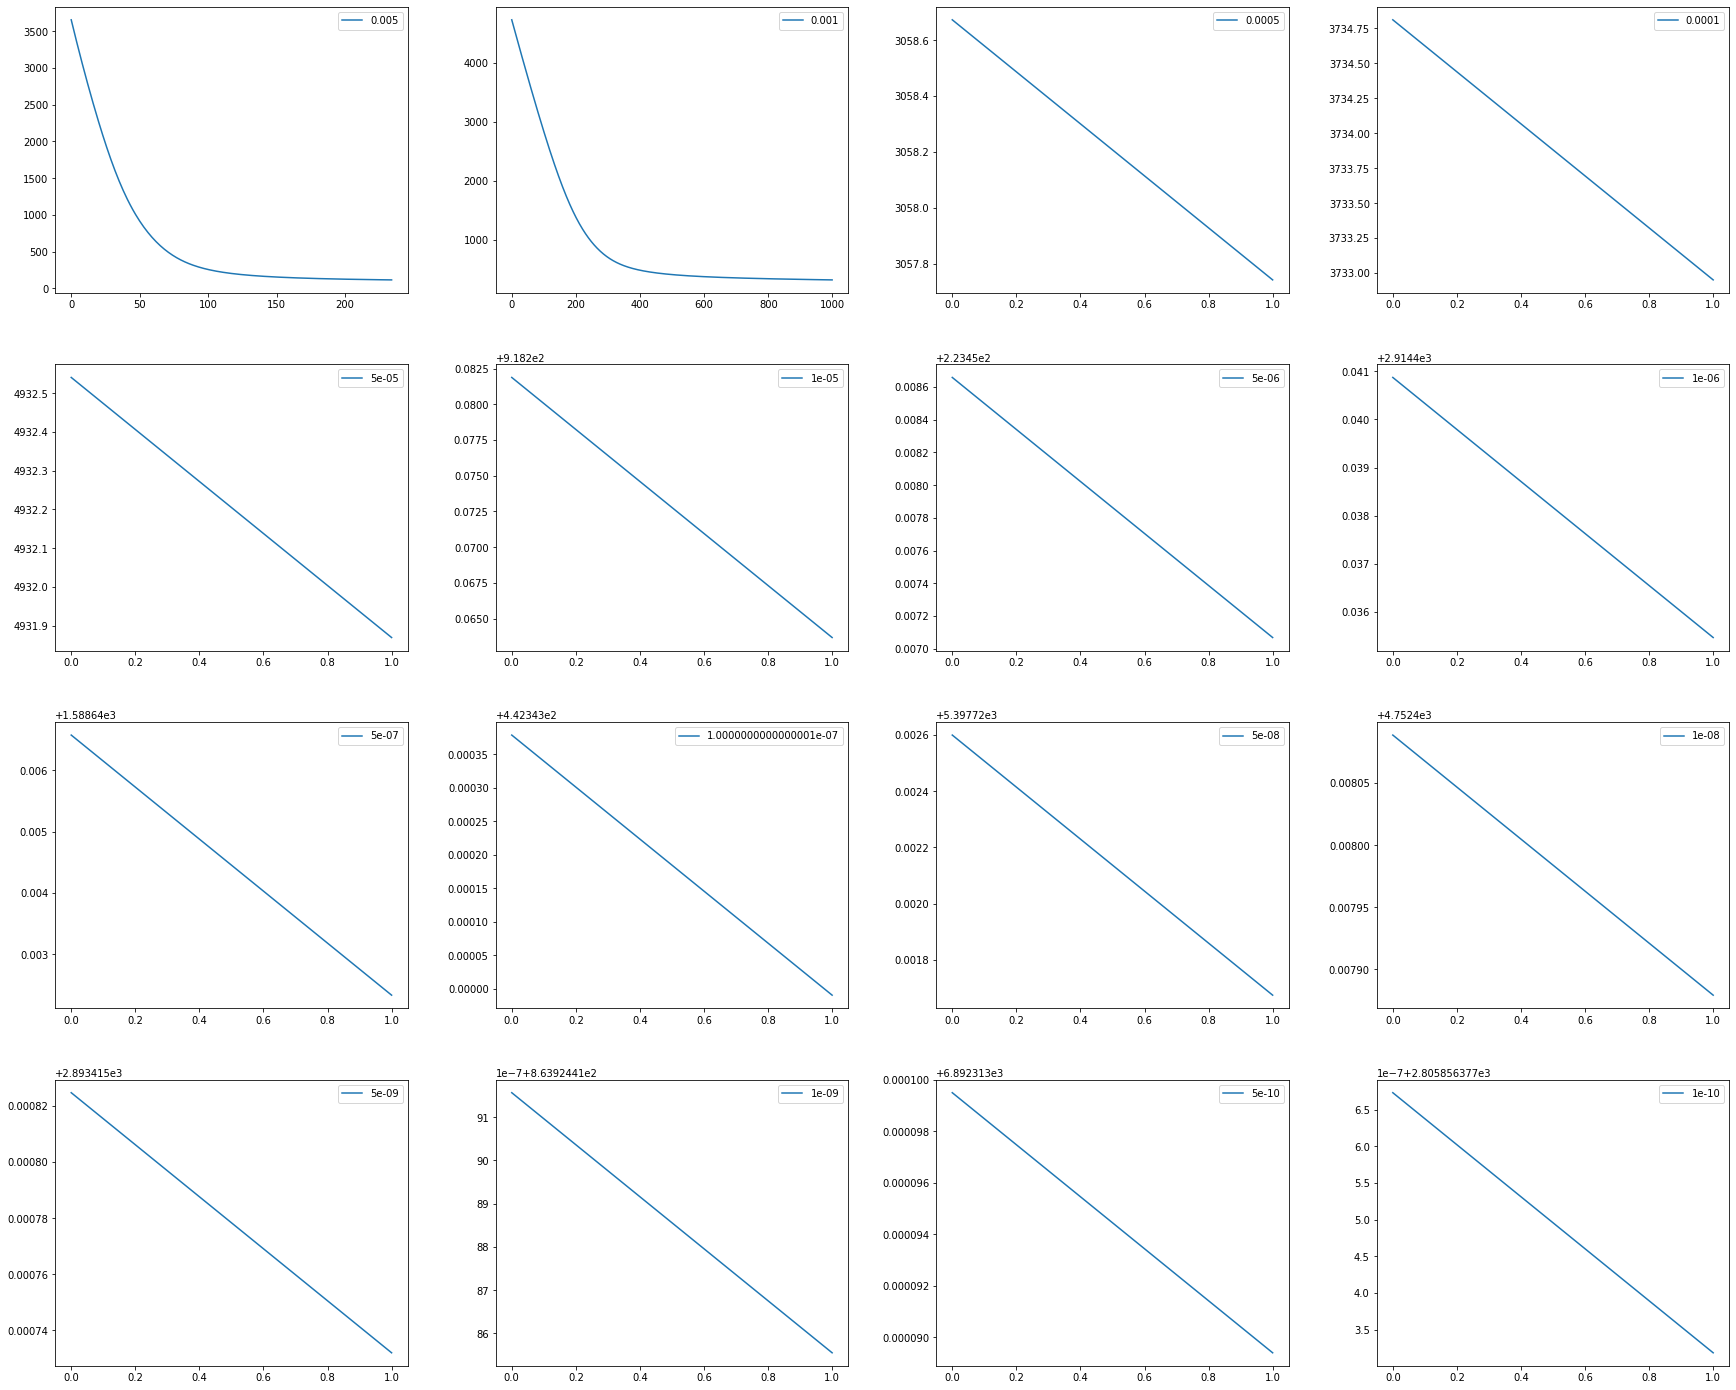

In [546]:
plt.rcParams['figure.figsize'] = [14, 8]
fig = plt.figure(figsize=(30, 25))
grid = plt.GridSpec(4, 4, wspace = .25, hspace = .25)
for i in range(0, len(iters)):
    plt.subplot(grid[i])
    plt.plot(losses[i])
    plt.legend([rates[i]])
plt.show()

In [547]:
losses=[]
for i in range(0, len(iters)):
    model1 = logit(X1_train, y1_train ,add_intercept = True)
    loss1, betas1 = model1.fit(method = "GD", verbose = False, max_iter = iters[i], lr = 0.005)
    print("Iterations:", i)
    print("Loss:", loss1[-1])
    print("GD accuracy:", model1.accuracy(model1.X, model1.y))
    losses.append(loss1)
losses

Iterations: 0
Loss: 529.4401632857039
GD accuracy: 0.7793983591613491
Iterations: 1
Loss: 246.2776023109491
GD accuracy: 0.8824065633546034
Iterations: 2
Loss: 204.44896121297472
GD accuracy: 0.918869644484959
Iterations: 3
Loss: 300.40414183308326
GD accuracy: 0.8824065633546034
Iterations: 4
Loss: 110.37998986145544
GD accuracy: 0.9808568824065633
Iterations: 5
Loss: 114.08051696292836
GD accuracy: 0.9544211485870556
Iterations: 6
Loss: 118.12626194556879
GD accuracy: 0.96718322698268
Iterations: 7
Loss: 126.62815695202201
GD accuracy: 0.9653600729261622
Iterations: 8
Loss: 75.76953894335921
GD accuracy: 0.98359161349134
Iterations: 9
Loss: 199.95190331760517
GD accuracy: 0.9206927985414768
Iterations: 10
Loss: 118.94122921805169
GD accuracy: 0.95897903372835
Iterations: 11
Loss: 180.40400249754504
GD accuracy: 0.9644484958979034
Iterations: 12
Loss: 108.40191999034036
GD accuracy: 0.9626253418413856
Iterations: 13
Loss: 171.80879289060604
GD accuracy: 0.95897903372835
Iterations: 14

[[1616.1491368571487,
  1601.649405521207,
  1587.1938291133504,
  1572.7831118496392,
  1558.4179715927025,
  1544.0991398815502,
  1529.8273619477527,
  1515.6033967161827,
  1501.4280167896595,
  1487.30200841725,
  1473.2261714450738,
  1459.2013192489917,
  1445.228278648189,
  1431.307889799048,
  1417.441006067959,
  1403.6284938826154,
  1389.871232560235,
  1376.170114112122,
  1362.5260430228363,
  1348.9399360031928,
  1335.4127217154048,
  1321.945340469259,
  1308.538743887454,
  1295.1938945387544,
  1281.911765537107,
  1268.6933401049419,
  1255.539611098773,
  1242.4515804950438,
  1229.4302588341552,
  1216.4766646205937,
  1203.5918236768644,
  1190.776768449106,
  1178.0325372620603,
  1165.3601735214083,
  1152.7607248610775,
  1140.2352422339013,
  1127.7847789435016,
  1115.4103896161253,
  1103.1131291109932,
  1090.8940513684604,
  1078.7542081954753,
  1066.6946479885876,
  1054.716414395185,
  1042.8205449144816,
  1031.008069440451,
  1019.2800087497903,
  1

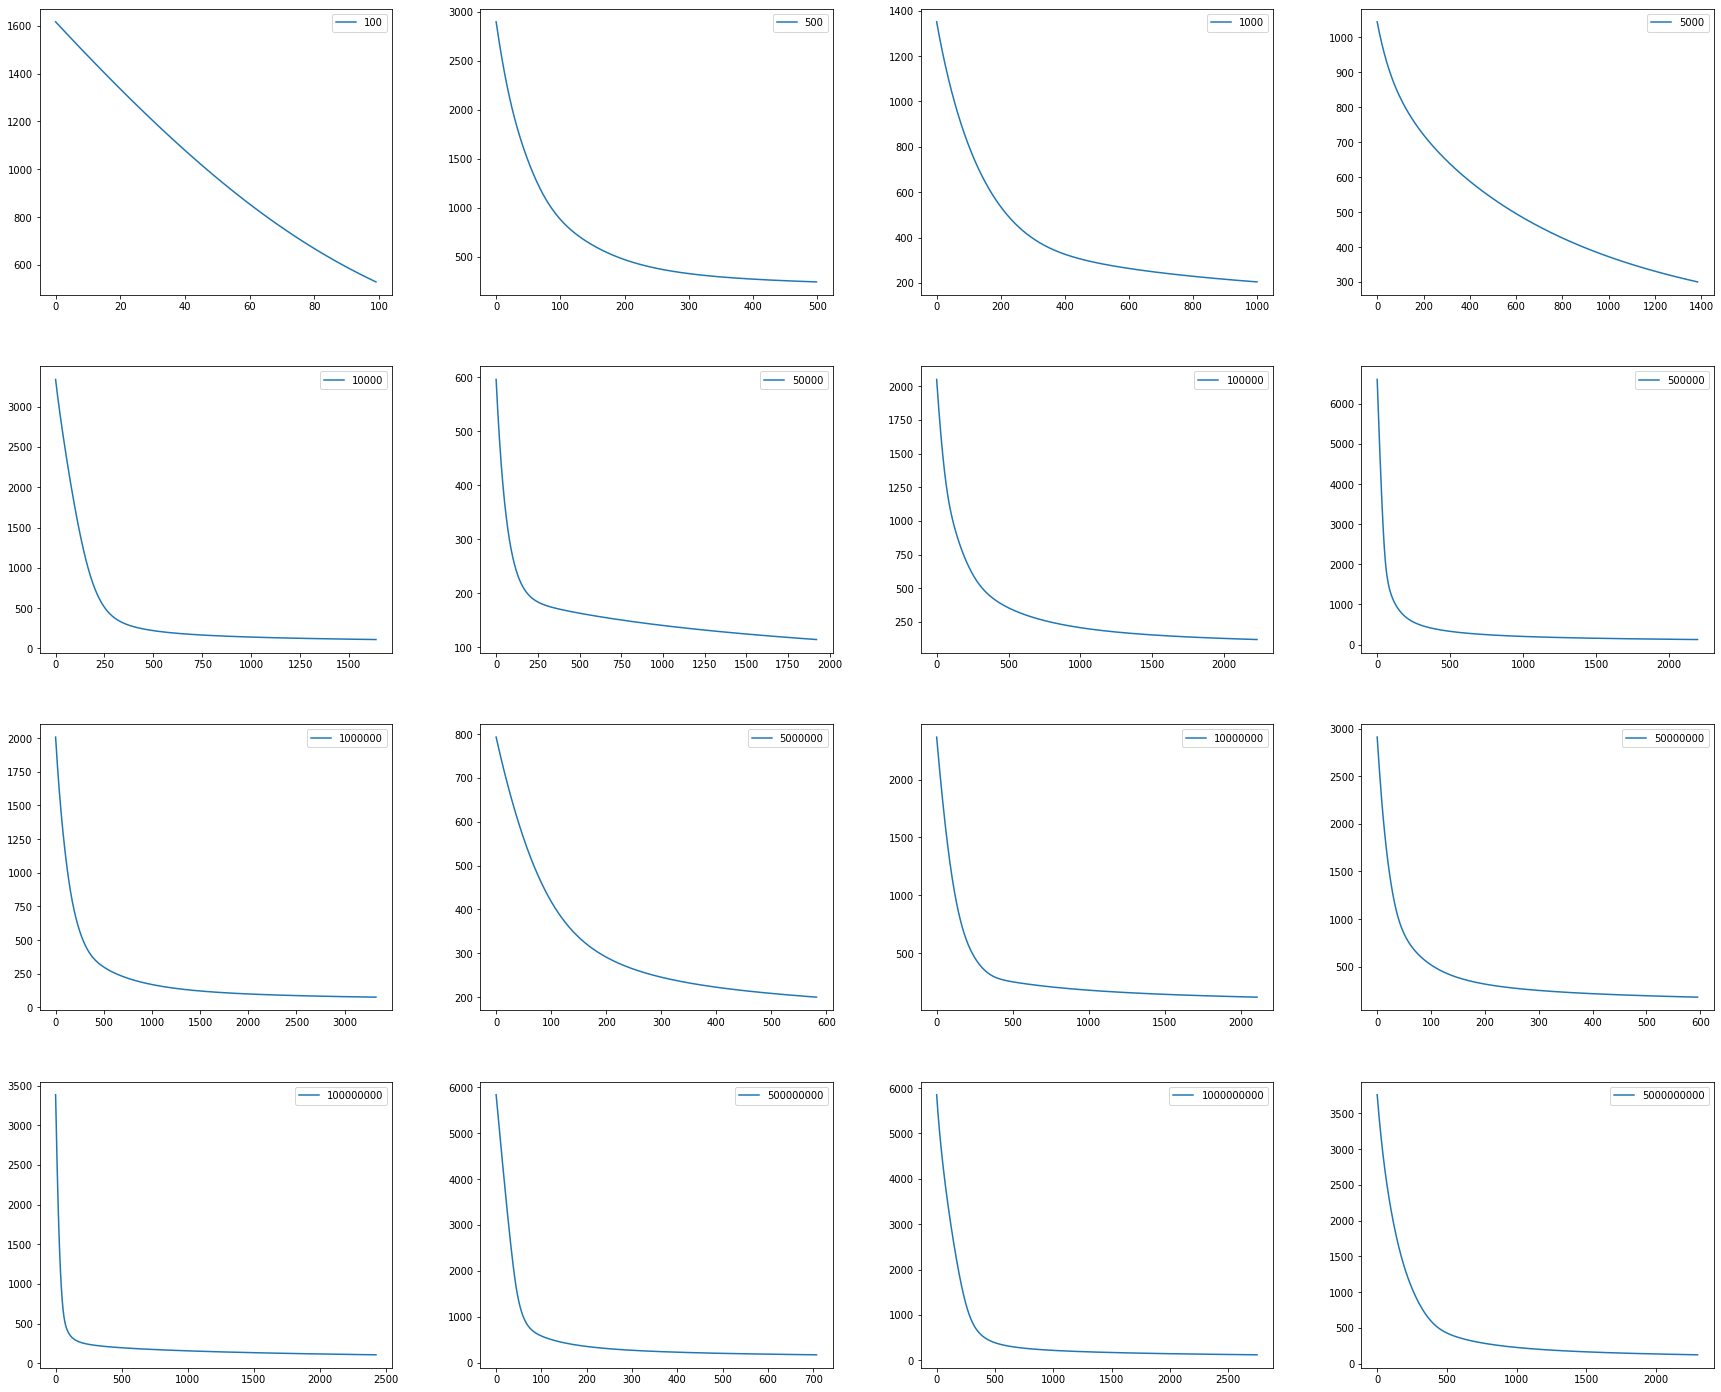

In [548]:
plt.rcParams['figure.figsize'] = [14, 8]
fig = plt.figure(figsize=(30, 25))
grid = plt.GridSpec(4, 4, wspace = .25, hspace = .25)
for i in range(0, len(iters)):
    plt.subplot(grid[i])
    plt.plot(losses[i])
    plt.legend([iters[i]])
plt.show()

In [473]:
losses=np.zeros(shape=[16, 16])
for i in range(0, len(iters)):
    for j in range(0, len(rates)):
        model1 = logit(X1_train, y1_train ,add_intercept = True)
        loss1, betas1 = model1.fit(method = "GD", verbose = False, max_iter = iters[i], lr = rates[j])
        print("Rate:", j)
        print("Iterations:", i)
        print("Loss:", loss1[-1])
        print("GD accuracy:", model1.accuracy(model1.X, model1.y))
        losses[i][j]=loss1[-1]
        #print("GD recall:", model1.recall(model1.X, model1.y))
        #print("GD precision:", model1.precision(model1.X, model1.y))
        #print("GD F measure:", model1.f_measure(model1.X, model1.y))
        #plt.plot(loss1)
        #plt.show()
losses

Rate: 0
Iterations: 0
Loss: 2114.239487684886
GD accuracy: 0.6162260711030082
Rate: 1
Iterations: 0
Loss: 1979.738870859518
GD accuracy: 0.6545123062898814
Rate: 2
Iterations: 0
Loss: 14274.376298513256
GD accuracy: 0.3217866909753874
Rate: 3
Iterations: 0
Loss: 601.3385454194067
GD accuracy: 0.8659981768459435
Rate: 4
Iterations: 0
Loss: 582.4432315223017
GD accuracy: 0.8258887876025525
Rate: 5
Iterations: 0
Loss: 4169.446951663002
GD accuracy: 0.33272561531449407
Rate: 6
Iterations: 0
Loss: 3425.9325574641084
GD accuracy: 0.22515952597994532
Rate: 7
Iterations: 0
Loss: 5701.084480837263
GD accuracy: 0.495897903372835
Rate: 8
Iterations: 0
Loss: 5538.8508245444145
GD accuracy: 0.4220601640838651
Rate: 9
Iterations: 0
Loss: 3368.619938904771
GD accuracy: 0.4986326344576117
Rate: 10
Iterations: 0
Loss: 1926.3327695124394
GD accuracy: 0.6061987237921604
Rate: 11
Iterations: 0
Loss: 2113.16405889666
GD accuracy: 0.6043755697356427
Rate: 12
Iterations: 0
Loss: 3020.4575355887446
GD accurac

Rate: 0
Iterations: 7
Loss: 259.66527177021266
GD accuracy: 0.8906107566089334
Rate: 1
Iterations: 7
Loss: 361.1752472126266
GD accuracy: 0.9051959890610757
Rate: 2
Iterations: 7
Loss: 233.0350622456524
GD accuracy: 0.9462169553327257
Rate: 3
Iterations: 7
Loss: 6068.506500919864
GD accuracy: 0.4995442114858706
Rate: 4
Iterations: 7
Loss: 2736.1586842219594
GD accuracy: 0.3609845031905196
Rate: 5
Iterations: 7
Loss: 4687.805936305568
GD accuracy: 0.14585232452142205
Rate: 6
Iterations: 7
Loss: 8222.854660344688
GD accuracy: 0.23701002734731086
Rate: 7
Iterations: 7
Loss: 1578.4095120564189
GD accuracy: 0.5597082953509571
Rate: 8
Iterations: 7
Loss: 874.6920687177416
GD accuracy: 0.6900638103919782
Rate: 9
Iterations: 7
Loss: 12093.581266386507
GD accuracy: 0.3072014585232452
Rate: 10
Iterations: 7
Loss: 4500.3408619527145
GD accuracy: 0.5086599817684594
Rate: 11
Iterations: 7
Loss: 1320.5114136006746
GD accuracy: 0.7474931631722881
Rate: 12
Iterations: 7
Loss: 2034.7441302064901
GD acc

Rate: 0
Iterations: 14
Loss: 229.16604364036186
GD accuracy: 0.9079307201458523
Rate: 1
Iterations: 14
Loss: 208.9849273401595
GD accuracy: 0.9398359161349134
Rate: 2
Iterations: 14
Loss: 5048.534465737723
GD accuracy: 0.6207839562443026
Rate: 3
Iterations: 14
Loss: 1220.6318818308418
GD accuracy: 0.6572470373746582
Rate: 4
Iterations: 14
Loss: 1364.0864333191078
GD accuracy: 0.7429352780309936
Rate: 5
Iterations: 14
Loss: 5350.589804690516
GD accuracy: 0.19143117593436645
Rate: 6
Iterations: 14
Loss: 1092.121469949403
GD accuracy: 0.7812215132178669
Rate: 7
Iterations: 14
Loss: 1021.5365047485064
GD accuracy: 0.6773017319963537
Rate: 8
Iterations: 14
Loss: 1336.438263561722
GD accuracy: 0.6955332725615314
Rate: 9
Iterations: 14
Loss: 1871.8980302126579
GD accuracy: 0.41476754785779396
Rate: 10
Iterations: 14
Loss: 1960.863526358843
GD accuracy: 0.5524156791248861
Rate: 11
Iterations: 14
Loss: 9231.26841142034
GD accuracy: 0.3764813126709207
Rate: 12
Iterations: 14
Loss: 2959.046144172

array([[ 2114.23948768,  1979.73887086, 14274.37629851,   601.33854542,
          582.44323152,  4169.44695166,  3425.93255746,  5701.08448084,
         5538.85082454,  3368.6199389 ,  1926.33276951,  2113.1640589 ,
         3020.45753559,  1591.23638373,   840.06313806,  7709.38378999],
       [  298.49896592,   792.12571659,  1273.86805543, 10285.05779149,
        12865.84615213,  2745.16607855,  5345.00924154, 10494.74178588,
         7885.3723395 ,  2792.55069088, 13218.3628454 ,  4864.60797436,
         1342.4045703 ,  2730.66586228,  1026.45495672,   720.98573039],
       [  145.86767409,   323.12096615,   491.88869987,  4374.71229849,
         2810.46487824,  5236.11168847,  5742.7982463 ,  4270.53211734,
         2210.63832337,  4865.56071514,  7567.86820922,  1578.92229298,
         4813.04443909,   893.52872013,   555.72551294,  1347.44738406],
       [   94.08103809,   270.34414093,   399.73845937,  1545.49340019,
         6940.24292944,  3946.56210984,  1001.8847546 ,  2183

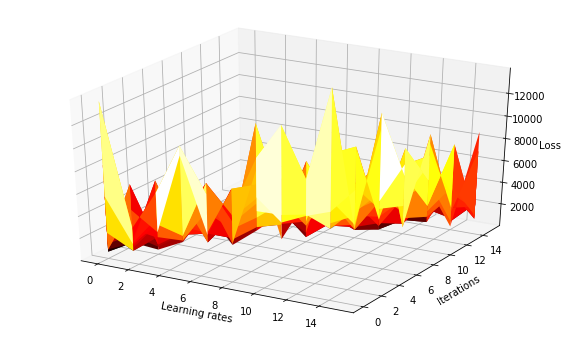

In [525]:
plt.rcParams['figure.figsize'] = [10, 6]
fig = plt.figure()
ax = plt.axes(projection='3d')
ranges = np.array([i for i in range(0,16)])
ax.plot_surface(ranges, ranges, losses, rstride=1, cstride=1, cmap='hot')
ax.set_xlabel('Learning rates')
ax.set_ylabel('Iterations')
ax.set_zlabel('Loss');

In [442]:
model2 = logit(X1_train, y1_train ,add_intercept = True)
loss2, betas2 = model2.fit(method = "SGD", verbose = True, max_iter = 1000, lr = 0.00005, stop_condition = 0.00000001)
print("SGD accuracy:", model2.accuracy(model2.X, model2.y))
print("SGD recall:", model2.recall(model2.X, model2.y))
print("SGD precision:", model2.precision(model2.X, model2.y))
print("SGD F measure:", model2.f_measure(model2.X, model2.y))

0.0018547824400959817
iteration 1 loss function value = 1819.463481593557
0.0007129931689899847
iteration 2 loss function value = 1369.3724655725136
0.00041308565475004996
iteration 3 loss function value = 1028.796115368937
0.00043621294345840776
iteration 4 loss function value = 786.7714737583597
0.0004408134745301312
iteration 5 loss function value = 628.864639960017
0.0004246269303067389
iteration 6 loss function value = 529.1223928444476
0.0003973266306845266
iteration 7 loss function value = 463.60604605802087
0.00036574746562415716
iteration 8 loss function value = 417.38519022647495
0.0003336308132614023
iteration 9 loss function value = 382.4282338503292
0.00030280270888639996
iteration 10 loss function value = 354.4823386678619
0.00027408113439741813
iteration 11 loss function value = 331.2141493956908
0.0002477751548070011
iteration 12 loss function value = 311.27571317564764
0.00022393705886739976
iteration 13 loss function value = 293.8442573386126
0.00020248867312471752
it

6.627559148255076e-06
iteration 111 loss function value = 73.04018515565818
6.581262974337139e-06
iteration 112 loss function value = 72.76627802528661
6.535625348889061e-06
iteration 113 loss function value = 72.49713737274445
6.490630488924832e-06
iteration 114 loss function value = 72.23263822533562
6.446263150392534e-06
iteration 115 loss function value = 71.9726599171679
6.402508603536482e-06
iteration 116 loss function value = 71.71708590402824
6.359352608459529e-06
iteration 117 loss function value = 71.46580358782236
6.316781393507989e-06
iteration 118 loss function value = 71.21870415000822
6.274781634081465e-06
iteration 119 loss function value = 70.97568239348043
6.233340433255793e-06
iteration 120 loss function value = 70.73663659240582
6.19244530271544e-06
iteration 121 loss function value = 70.5014683495438
6.1520841458048316e-06
iteration 122 loss function value = 70.27008246061538
6.11224524032113e-06
iteration 123 loss function value = 70.04238678531082
6.0729172232721

3.7060688635535337e-06
iteration 219 loss function value = 57.649215751601055
3.6897138565210382e-06
iteration 220 loss function value = 57.57436013866921
3.6734663730567473e-06
iteration 221 loss function value = 57.5001177479038
3.6573251520353957e-06
iteration 222 loss function value = 57.426480054275544
3.6412889540540663e-06
iteration 223 loss function value = 57.353438688224514
3.6253565618268735e-06
iteration 224 loss function value = 57.280985432197305
3.60952677967392e-06
iteration 225 loss function value = 57.209112217276854
3.593798432963041e-06
iteration 226 loss function value = 57.13781111990092
3.5781703670652834e-06
iteration 227 loss function value = 57.06707435866448
3.5626414480190235e-06
iteration 228 loss function value = 56.99689429120794
3.547210561402733e-06
iteration 229 loss function value = 56.92726341118335
3.531876611819005e-06
iteration 230 loss function value = 56.85817434530061
3.51663852322559e-06
iteration 231 loss function value = 56.78961985044903
3.

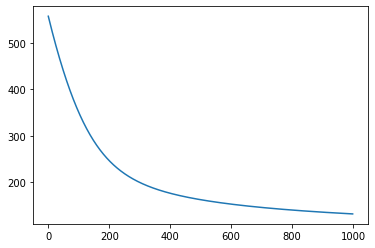

In [443]:
plt.plot(loss1)

In [488]:
losses=np.zeros(shape=[16, 16])
for i in range(0, len(iters)):
    for j in range(0, len(rates)):
        model1 = logit(X1_train, y1_train ,add_intercept = True)
        loss1, betas1 = model1.fit(method = "SGD", verbose = False, max_iter = iters[i], lr = rates[j])
        print("Rate:", j)
        print("Iterations:", i)
        print("Loss:", loss1[-1])
        print("SGD accuracy:", model1.accuracy(model1.X, model1.y))
        losses[i][j]=loss1[-1]
        #print("GD recall:", model1.recall(model1.X, model1.y))
        #print("GD precision:", model1.precision(model1.X, model1.y))
        #print("GD F measure:", model1.f_measure(model1.X, model1.y))
        #plt.plot(loss1)
        #plt.show()
losses

Breaking
0.0006590838247510595
Rate: 0
Iterations: 0
Loss: 6963.248073965239
SGD accuracy: 0.3053783044667274
Breaking
4.62223253862912e-05
Rate: 1
Iterations: 0
Loss: 907.7226567920954
SGD accuracy: 0.690975387420237
Breaking
1.9081848834286013e-06
Rate: 2
Iterations: 0
Loss: 3263.4731619378204
SGD accuracy: 0.5095715587967183
Breaking
0.00044108373528721175
Rate: 3
Iterations: 0
Loss: 2657.773146244828
SGD accuracy: 0.5624430264357339
Breaking
0.0005591100947910436
Rate: 4
Iterations: 0
Loss: 2440.8875264396947
SGD accuracy: 0.6071103008204193
Breaking
0.0003147332267991727
Rate: 5
Iterations: 0
Loss: 3427.2438489036354
SGD accuracy: 0.6235186873290793
Breaking
1.6616733525997352e-08
Rate: 6
Iterations: 0
Loss: 7957.418625061231
SGD accuracy: 0.3108477666362808
Breaking
4.255134070448891e-06
Rate: 7
Iterations: 0
Loss: 388.5200012287644
SGD accuracy: 0.8076572470373746
Breaking
6.295999657070914e-05
Rate: 8
Iterations: 0
Loss: 3727.800229495694
SGD accuracy: 0.4247948951686418
Breaki

SGD accuracy: 0.4010938924339107
Breaking
1.1481693432835512e-08
Rate: 11
Iterations: 5
Loss: 1963.7132789497823
SGD accuracy: 0.5879671832269827
Breaking
4.3070994863891303e-07
Rate: 12
Iterations: 5
Loss: 1192.225296310737
SGD accuracy: 0.731084776663628
Breaking
6.8115217574381816e-09
Rate: 13
Iterations: 5
Loss: 3076.0126028304594
SGD accuracy: 0.4822242479489517
Breaking
1.1036956688911441e-11
Rate: 14
Iterations: 5
Loss: 2571.4349349816275
SGD accuracy: 0.5524156791248861
Breaking
4.666165561319684e-10
Rate: 15
Iterations: 5
Loss: 1599.230456858916
SGD accuracy: 0.6545123062898814
Breaking
3.4630553926530924e-06
Rate: 0
Iterations: 6
Loss: 3161.9837696265413
SGD accuracy: 0.3682771194165907
Breaking
0.0001781646384550296
Rate: 1
Iterations: 6
Loss: 1548.1628657740362
SGD accuracy: 0.504102096627165
Breaking
8.90617426816143e-08
Rate: 2
Iterations: 6
Loss: 6204.556324537196
SGD accuracy: 0.4886052871467639
Breaking
0.0008195172832711307
Rate: 3
Iterations: 6
Loss: 2263.72233760196

SGD accuracy: 0.6608933454876937
Breaking
5.248044265690772e-06
Rate: 7
Iterations: 11
Loss: 5994.4440267162045
SGD accuracy: 0.3600729261622607
Breaking
1.7370876753388197e-06
Rate: 8
Iterations: 11
Loss: 2902.265214722529
SGD accuracy: 0.5952597994530537
Breaking
1.7908246169906736e-06
Rate: 9
Iterations: 11
Loss: 2368.170646770187
SGD accuracy: 0.6144029170464904
Breaking
1.9399620987094546e-09
Rate: 10
Iterations: 11
Loss: 4918.050116121662
SGD accuracy: 0.4886052871467639
Breaking
3.995644684966603e-12
Rate: 11
Iterations: 11
Loss: 6584.456466028368
SGD accuracy: 0.4658158614402917
Breaking
1.912317709976917e-08
Rate: 12
Iterations: 11
Loss: 1403.9587199797593
SGD accuracy: 0.585232452142206
Breaking
6.84531013591944e-09
Rate: 13
Iterations: 11
Loss: 1352.8743144986347
SGD accuracy: 0.7383773928896992
Breaking
1.492035788563191e-09
Rate: 14
Iterations: 11
Loss: 3129.0575942624437
SGD accuracy: 0.5031905195989061
Breaking
7.31484713781373e-11
Rate: 15
Iterations: 11
Loss: 5195.7107

array([[ 6963.24807397,   907.72265679,  3263.47316194,  2657.77314624,
         2440.88752644,  3427.2438489 ,  7957.41862506,   388.52000123,
         3727.8002295 ,  7153.9784291 ,  3208.1783851 ,   864.47128997,
         3336.83912302,  3617.23400844,  2679.38873005,  2317.37752973],
       [ 1160.87628091,  6538.1697301 ,   842.32137444,  1752.61886433,
         3030.42691941,  2248.88610563,  3893.22519173,  3911.7975876 ,
         1467.78398343,  4529.65571515,  5067.30220082,  3272.73709254,
         5907.21259053,  2069.96737172,  1023.66712197,  2075.68882208],
       [ 5627.57248423,   721.88653966,  2710.55253021,  5634.12320284,
         3285.84407312,  1508.56948687,  3061.08759583,  3696.4321896 ,
         6980.71794804,  1277.65834878,   952.73269804,  1133.26725277,
          892.30439682,  3039.70624125,  3285.56458266,  2376.74516852],
       [ 1300.74162806,  1981.62118693,  3862.33814861,  3263.07278362,
         1230.35690984,  2039.99947135,  3182.21737676,  2646

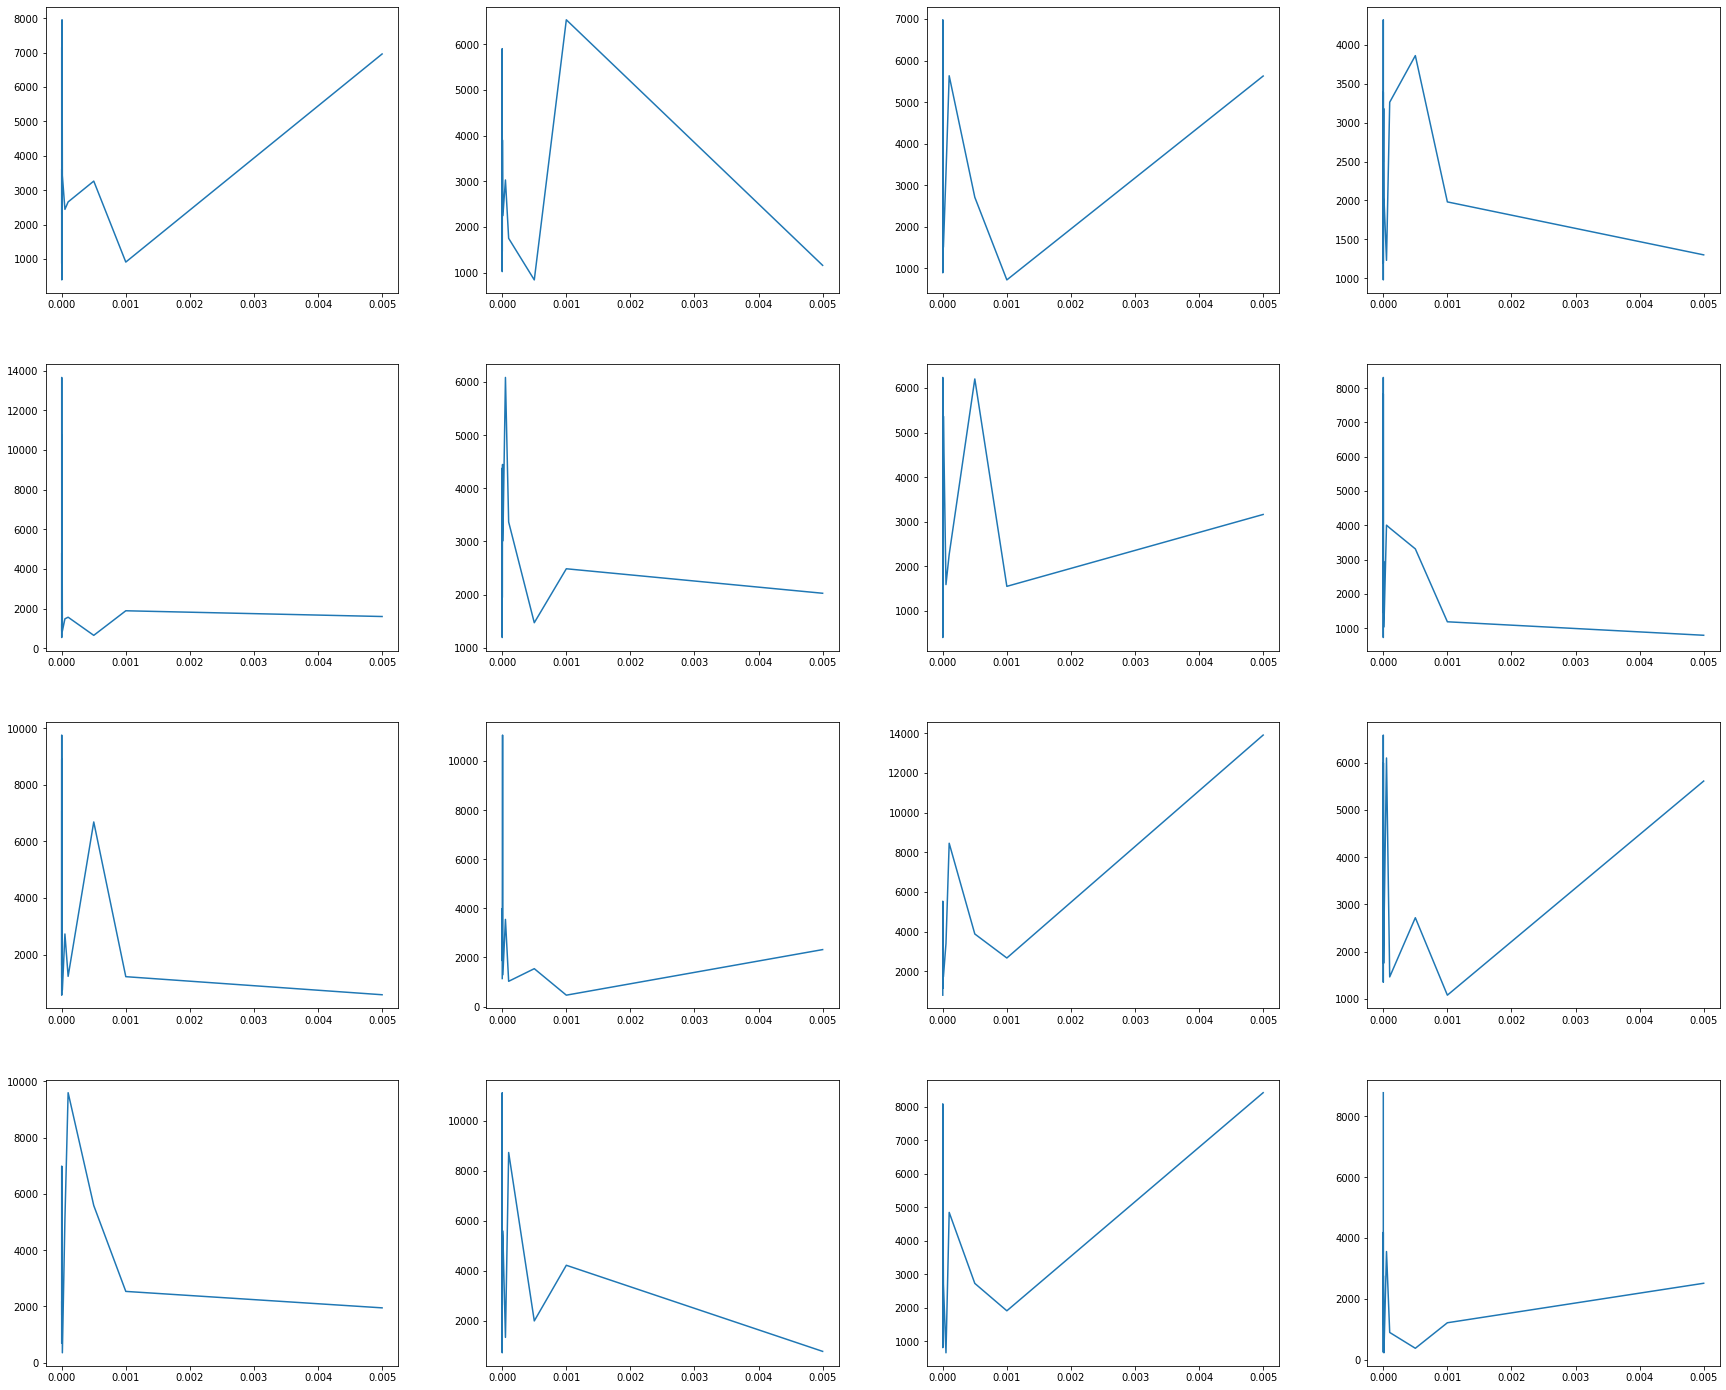

In [537]:
plt.rcParams['figure.figsize'] = [14, 8]
fig = plt.figure(figsize=(30, 25))
grid = plt.GridSpec(4, 4, wspace = .25, hspace = .25)
for i in range(0, len(iters)):
    plt.subplot(grid[i])
    plt.plot(rates, losses[i])
plt.show()

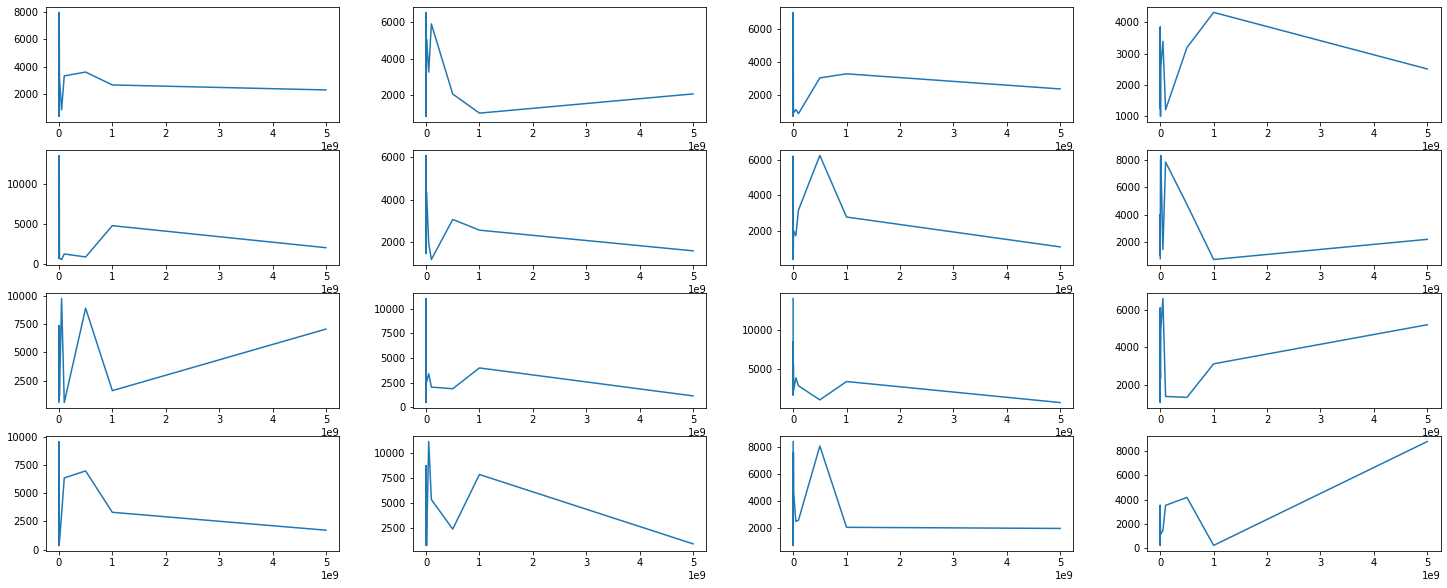

In [535]:
plt.rcParams['figure.figsize'] = [14, 8]
fig = plt.figure(figsize=(25, 10))
grid = plt.GridSpec(4, 4, wspace = .25, hspace = .25)
for i in range(0, len(rates)):
    plt.subplot(grid[i])
    plt.plot(iters, losses[i])
plt.show()

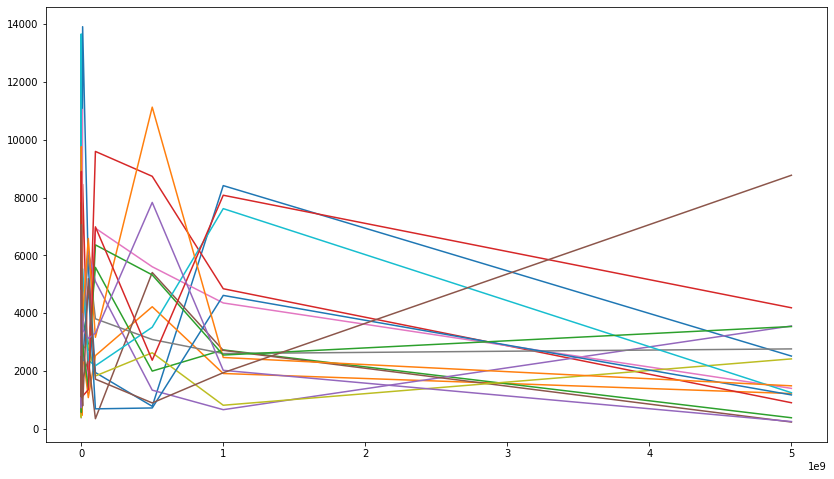

In [519]:
plt.rcParams['figure.figsize'] = [14, 8]
fig = plt.figure()
ax = plt.axes()
for i in range(0, len(rates)):
    ax.plot(iters, losses[:,i])

In [361]:
model3 = logit(X1_train, y1_train, add_intercept = True)
loss3, betas3 = model3.fit(method = "IRLS2", verbose = True, max_iter = 10, lr = 0.01, stop_condition = 0.0001)
print("IRLS accuracy:", model3.accuracy(model3.X, model3.y))
print("IRLS recall:", model3.recall(model3.X, model3.y))
print("IRLS precision:", model3.precision(model3.X, model3.y))
print("IRLS F measure:", model3.f_measure(model3.X, model3.y))

iteration 1 loss function value = 4.3276493499897967e-13
iteration 2 loss function value = -0.0
iteration 3 loss function value = -0.0
iteration 4 loss function value = -0.0
iteration 5 loss function value = 386.8872513023671
iteration 6 loss function value = -0.0
iteration 7 loss function value = 634.87484106185
iteration 8 loss function value = -0.0
iteration 9 loss function value = 336.1323515000149
IRLS accuracy: 0.5512699905926622
IRLS recall: 0.32223903177004537
IRLS precision: 0.8801652892561983
IRLS F measure: 0.47176079734219273


/Users/karolinabogacka/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/Users/karolinabogacka/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in exp


In [538]:
model3 = null_logit(X1_train, y1_train, add_intercept = True)
loss3, betas3 = model3.fit(method = "IRLS2", verbose = True, max_iter = 10, lr = 0.01, stop_condition = 0.0001)
print("IRLS accuracy:", model3.accuracy(model3.X, model3.y))
print("IRLS recall:", model3.recall(model3.X, model3.y))
print("IRLS precision:", model3.precision(model3.X, model3.y))
print("IRLS F measure:", model3.f_measure(model3.X, model3.y))

iteration 1 loss function value = 1503.9596150873417
iteration 2 loss function value = 43987.863407057564
iteration 3 loss function value = 615.0865796111757
iteration 4 loss function value = -0.0
iteration 5 loss function value = -0.0
iteration 6 loss function value = -0.0
iteration 7 loss function value = 195.03052212693729
iteration 8 loss function value = -0.0
iteration 9 loss function value = 364.21779532759683
IRLS accuracy: 0.9571558796718322
IRLS recall: 0.9036885245901639
IRLS precision: 1.0
IRLS F measure: 0.9494079655543595


/Users/karolinabogacka/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/Users/karolinabogacka/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in exp


In [552]:
clf = LinearDiscriminantAnalysis()
clf.fit(X1_train, y1_train)
clf.predict(X1_train)

array([1, 1, 1, ..., 1, 0, 0])

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = "lbfgs", fit_intercept=True, max_iter=1000)
model.fit(X1_train, y1_train)
print(model.score(X1_train, y1_train))
model.coef_

0.9038793103448276


array([[-1.92093266e-12, -1.88008283e-12, -1.86066965e-12,
        -1.73261110e-12, -1.86054453e-12, -1.80848485e-12,
        -1.23179421e-14, -1.14656623e-07, -2.63900412e-16,
         1.18071756e-16, -7.73609476e-16, -1.31709861e-14,
        -1.67427823e-15, -9.21501045e-16,  1.63446256e-15,
        -7.53259397e-15, -2.06003973e-15]])

In [27]:
from statsmodels.discrete.discrete_model import Logit

#X = df.drop("chd", axis = 1, inplace=False)
#y = df.chd

model = Logit(endog = y1_train, exog = X1_train)
res = model.fit()
np.sum((res.predict(X1_train) > 0.5) == y1_train) / X1_train.shape[0]

Optimization terminated successfully.
         Current function value: 0.229942
         Iterations 8


0.9144396551724138

In [387]:
X.shape

(150, 2)

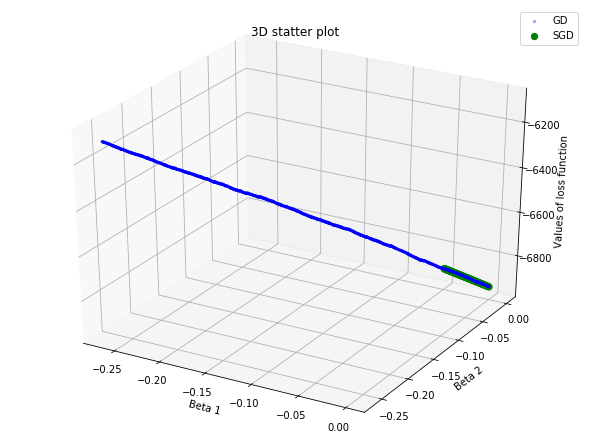

In [126]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,6))
ax = Axes3D(fig)

sequence_containing_x_vals1 = [i[0][0] for i in betas1]
sequence_containing_y_vals1 = [i[1][0] for i in betas1]
sequence_containing_z_vals1 = loss1

sequence_containing_x_vals2 = [i[0][0] for i in betas2]
sequence_containing_y_vals2 = [i[1][0] for i in betas2]
sequence_containing_z_vals2 = loss2


ax.scatter(sequence_containing_x_vals2, sequence_containing_y_vals2, sequence_containing_z_vals2, marker = "o",
          color = "blue", s = 5, alpha =0.3)
ax.scatter(sequence_containing_x_vals1, sequence_containing_y_vals1, sequence_containing_z_vals1, marker = "o",
          color = "green", s = 40)

plt.title("3D statter plot")
ax.set_xlabel("Beta 1")
ax.set_ylabel("Beta 2")
ax.set_zlabel("Values of loss function")
plt.legend(["GD", "SGD"])
plt.show()